# <center><font color='silver'>**Coding 1: Data Management and Analysis with Python**</font></center>
### <center><font color='silver'>Central European University, 2024-2025</font></center>
### <center><font color='silver'>Final Project</font></center>

In [1]:
import os
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss

from patsy import dmatrices
import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils import lspline # watch the syntax here

warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

## Data - Boxers' Info

In [3]:
path = os.path.join('data', 'boxers.csv') # this will produce a path with the right syntax for your operating system
path

'data/boxers.csv'

In [4]:
boxers_data =  pd.read_csv(path)

In [5]:
boxers_data.head()

,Unnamed: 0,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,"Knockout, %",Losses,Draws,Debut
0,1,Kudratillo Abdukakhorov,Uzbekistan,31,177,orthodox,Super Welterweight,20,12,60,4,0,2015
1,2,Masood Abdulah,United Kingdom,31,170,orthodox,Featherweight,11,7,64,0,0,2021
2,3,Zaur Abdullaev,Russian Federation,30,175,orthodox,Lightweight,20,12,60,1,0,2017
3,4,Arthur Abraham,Armenia,44,175,orthodox,Super Middleweight,47,30,64,6,0,2003
4,5,Tomasz Adamek,Poland,48,187,orthodox,Heavyweight,53,31,58,6,0,1999


In [6]:
boxers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       828 non-null    int64 
 1   Name             828 non-null    object
 2   Nationality      828 non-null    object
 3   Age              828 non-null    int64 
 4   Height           828 non-null    int64 
 5   Stance           828 non-null    object
 6   Weight Division  828 non-null    object
 7   Wins             828 non-null    int64 
 8   Wins By KO       828 non-null    int64 
 9   Knockout, %      828 non-null    int64 
 10  Losses           828 non-null    int64 
 11  Draws            828 non-null    int64 
 12  Debut            828 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 84.2+ KB


In [7]:
boxers_data.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
boxers_data.head()

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,"Knockout, %",Losses,Draws,Debut
0,Kudratillo Abdukakhorov,Uzbekistan,31,177,orthodox,Super Welterweight,20,12,60,4,0,2015
1,Masood Abdulah,United Kingdom,31,170,orthodox,Featherweight,11,7,64,0,0,2021
2,Zaur Abdullaev,Russian Federation,30,175,orthodox,Lightweight,20,12,60,1,0,2017
3,Arthur Abraham,Armenia,44,175,orthodox,Super Middleweight,47,30,64,6,0,2003
4,Tomasz Adamek,Poland,48,187,orthodox,Heavyweight,53,31,58,6,0,1999


In [9]:
boxers_data["Featherweight"] = boxers_data["Weight Division"] == 'Featherweight'
boxers_data["Heavyweight"] = boxers_data["Weight Division"] == 'Heavyweight'

<hr>

## Distributions

##### Sorting in ascending order the dataset based on age

In [10]:
sorted_age = boxers_data.sort_values(by = 'Age', ascending = True) # we only do it for plotting purposes, linear regression does not require sorted data
sorted_age.reset_index(drop = True, inplace = True)

In [11]:
sorted_age

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,"Knockout, %",Losses,Draws,Debut,Featherweight,Heavyweight
0,Curmel Moton,United States,18,157,orthodox,Lightweight,6,5,83,0,0,2023,False,False
1,Abdullah Mason,United States,20,175,southpaw,Lightweight,16,14,88,0,0,2021,False,False
2,Moses Itauma,United Kingdom,20,198,southpaw,Heavyweight,11,9,82,0,0,2017,False,True
3,Elijah Garcia,United States,21,183,southpaw,Super Middleweight,16,13,81,1,0,2020,False,False
4,Albert Gonzalez,United States,22,170,orthodox,Featherweight,10,6,60,0,0,2021,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Antonio Tarver,United States,56,188,southpaw,Light Heavyweight,31,22,71,6,1,1997,False,False
824,Mike Tyson,United States,58,178,orthodox,Heavyweight,50,44,88,7,0,1985,False,True
825,Bernard Hopkins,United States,59,185,orthodox,Light Heavyweight,55,32,58,8,2,1988,False,False
826,Evander Holyfield,United States,62,189,orthodox,Heavyweight,44,29,66,10,2,1984,False,True


##### Sorting in ascending order the dataset based on height

In [12]:
sorted_height = boxers_data.sort_values(by = 'Height', ascending = True) # we only do it for plotting purposes, linear regression does not require sorted data
sorted_height.reset_index(drop = True, inplace = True)

In [13]:
sorted_height

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,"Knockout, %",Losses,Draws,Debut,Featherweight,Heavyweight
0,Gabriela Celeste,Argentina,28,152,orthodox,Flyweight,15,6,40,2,0,2018,False,False
1,Ginjiro Shigeoka,Japan,25,154,southpaw,Minimumweight,11,9,82,1,0,2018,False,False
2,Oscar Collazo,United States,27,155,southpaw,Minimumweight,11,8,73,0,0,2020,False,False
3,Thammanoon Niyomtrong,Thailand,34,155,orthodox,Minimumweight,25,9,36,1,0,2012,False,False
4,Ebanie Bridges,Australia,38,155,orthodox,Bantamweight,9,4,44,2,0,2019,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Deontay Wilder,United States,39,201,orthodox,Heavyweight,43,42,98,4,1,2008,False,True
824,Mariusz Wach,Poland,45,202,orthodox,Heavyweight,38,20,53,11,0,2005,False,True
825,Alexander Ustinov,Russian Federation,48,202,orthodox,Heavyweight,34,25,74,4,0,2005,False,True
826,Tyson Fury,United Kingdom,36,206,orthodox,Heavyweight,34,24,71,2,1,2008,False,True


<hr>

### Eyeballing the distribtuions

`Wins`

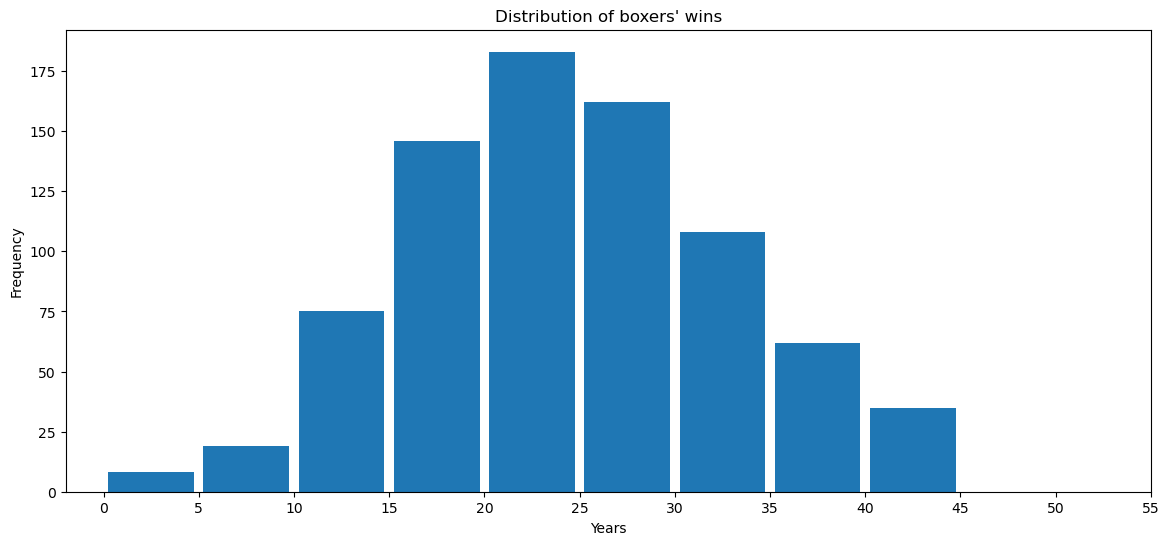

In [14]:
sorted_age.Wins.plot(
    kind = 'hist',  bins = range(0, 50, 5), rwidth = 0.9
    , figsize = (14,6)
    , xticks = range(0, 60, 5)
    , xlabel = 'Years'
    , title = 'Distribution of boxers\' wins'
);

It can be seen from the plot that `wins` is normally distributed

`Age`

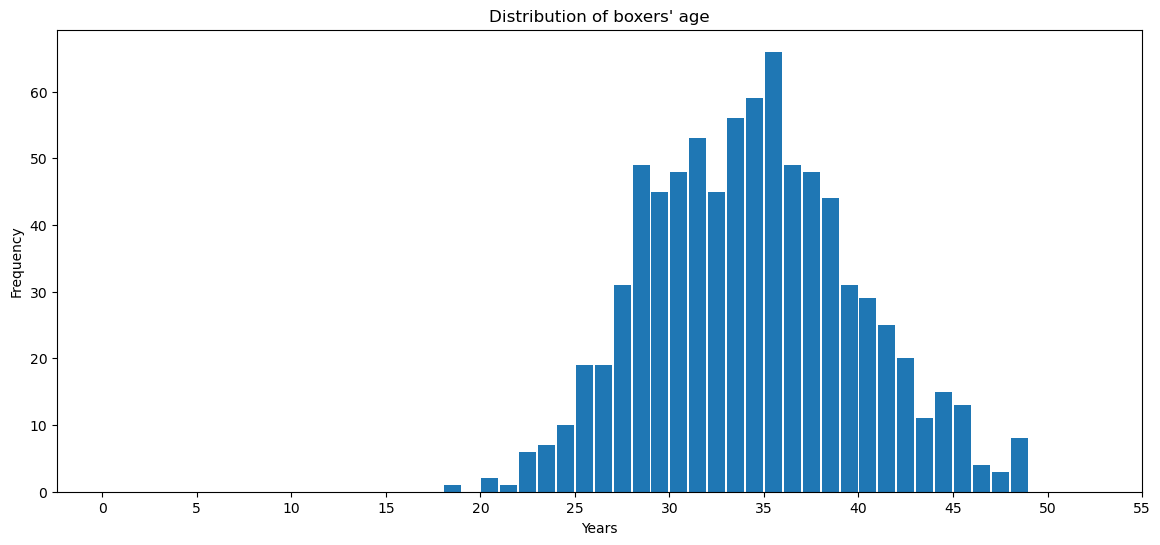

In [15]:
sorted_age.Age.plot(
    kind = 'hist',  bins = range(0, 50, 1), rwidth = 0.9
    , figsize = (14,6)
    , xticks = range(0, 60, 5)
    , xlabel = 'Years'
    , title = 'Distribution of boxers\' age'
);

It can be seen from the plot that `age` is normally distributed

`Height`

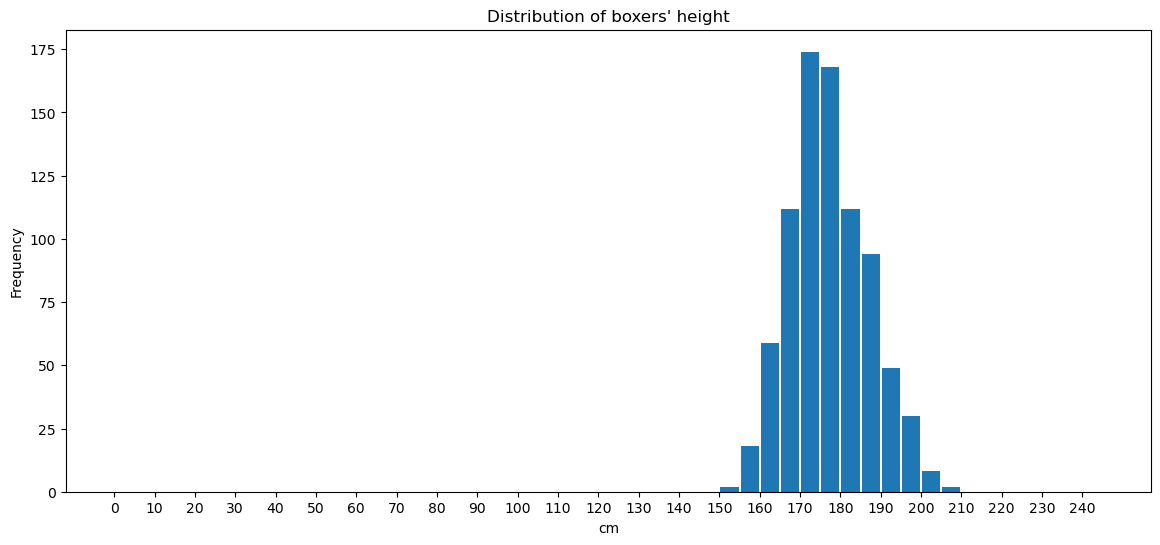

In [16]:
sorted_height.Height.plot(
    kind = 'hist',  bins = range(0, 250, 5), rwidth = 0.9
    , figsize = (14,6)
    , xticks = range(0, 250, 10)
    , xlabel = 'cm'
    , title = 'Distribution of boxers\' height'
);

It can be seen from the plot that `height` is normally distributed

<hr>

## Multiple Linear Regressions

#### General idea:
1. starting with simple linear models to see the basic relationships
2. introducing spline models to include non-linear relationships
3. introducing more features to make the model performance better

#### 1. Simple Linear Models
- chosen predictors `age` and `height` are logical contributors for boxer's best performance in terms of wins.

In [17]:
reg0 = smf.ols("Wins ~ Age", data = boxers_data).fit(cov_type = 'HC0')
reg1 = smf.ols("Wins ~ Height", data = boxers_data).fit(cov_type = 'HC0')
reg2 = smf.ols("Wins ~ Age + Height", data = boxers_data).fit(cov_type = 'HC0')

In [18]:
Stargazer([reg0, reg1, reg2])

##### (*) Out of 3 simple linear models, only combined one is performing a slightly better than other ones with R_2 of 0.004

<hr>

#### 2. Introducing splines for non-linear relationships
- Age and height breakpoints are introduced to reflect on an optimal combination for a boxer to win with additional predictors of two boundaries of weight division.

In [19]:
reg3 = smf.ols(
    "Wins ~ lspline(Age, [25, 35]) + lspline(Height, [170, 180]) + Featherweight + Heavyweight",
    data = boxers_data,
).fit(cov_type = 'HC0')

In [20]:
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     32.56
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.28e-44
Time:                        23:16:44   Log-Likelihood:                -3008.4
No. Observations:                 828   AIC:                             6035.
Df Residuals:                     819   BIC:                             6077.
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

##### (*) The model performance is significantly increased compared to the simple linear models with R_2 of 0.194 and 0.004 respectively. This means 19.4% variablity in wins is captured in this model through the chosen predictors.

<hr>

#### 3. Adding more predictors to increase model performance
- `Knockout, %` and `Debut` are introduced into the model because they significantly contribute to the boxer's wins reflecting on the years of experience since first debut and knockout ability.

In [21]:
reg4 = smf.ols(
    "Wins ~ lspline(Age, [25, 35]) + lspline(Height, [170, 180]) + Featherweight + Heavyweight + Q('Knockout, %') + Debut",
    data=boxers_data,
).fit(cov_type='HC0')


print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     73.80
Date:                Sun, 05 Jan 2025   Prob (F-statistic):          4.01e-107
Time:                        23:16:44   Log-Likelihood:                -2698.0
No. Observations:                 828   AIC:                             5418.
Df Residuals:                     817   BIC:                             5470.
Df Model:                          10                                         
Covariance Type:                  HC0                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### Lets discuss some of the coefficients:
- `intercept`: the number of wins for a baseline boxer (when others are equal to 0) which is unusually high enough possibly because baseline values may not be captured by other predictors
<br>

- `Featherweight` and `Heavyweight`: they are not statistically significant meaning being either of the weight division does not contribute for winning
<br>

- `spline(Age, [25, 35])[1]`: only age category that is statistically significant meaning boxers with age between 25 and 35 have negative relationship with wins due to aging affecting physical strength
<br>

- `spline Heights`: not statistically significant meaning no impact on wins
<br>

- `Knockout, %`: statistically significant meaning 1% increase in knockout, wins are increased by 0.0474 holding everything constant
<br>

- `Debut`: statistically significant meaning the boxers with the less years of experience have fewer wins

##### (*) The model performance is soared to 0.619 after introducing `Knockout, %` and `Debut` meaning their significance in the model. So, now 61.9% variablity in wins can be explained within the model.

<hr>

#### Checking with just age spline to see the sole contribution to the wins.

In [22]:
reg5 = smf.ols("Wins ~ lspline(Age, [25, 35])", data = boxers_data).fit(cov_type = 'HC0')

In [23]:
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     84.06
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.87e-47
Time:                        23:16:44   Log-Likelihood:                -3012.9
No. Observations:                 828   AIC:                             6034.
Df Residuals:                     824   BIC:                             6053.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

##### (*) The model performance is quite good compared to simple linear models with R_2 of 0.185 which is a little bit worse than the combined with height spline model meaning that age spline has a significant contribution to the model than height.

<hr>

#### Comparison of models

In [24]:
stargazer = Stargazer([reg0, reg1, reg2, reg3, reg4, reg5])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

##### (*) Out of all introduced and tested models, the winner is a complicated model with splines and more additional predictors with R_2 of 0.619.

<hr>

#### Finding overestimated fighters
- let's look at the overestimated wins and locate the boxer name to identify outlier 

In [25]:
boxers_data['wins_hat'] = reg4.predict(boxers_data)

In [26]:
pd.DataFrame({'a': boxers_data['wins_hat'], 'b':reg3.fittedvalues})

,a,b
0,20.525170,23.454100
1,12.315781,24.320328
2,17.931716,22.190418
3,37.224354,28.994470
4,42.276829,29.433080
...,...,...
823,31.470617,29.278111
824,20.834165,27.023345
825,30.973471,29.732781
826,16.093312,21.771425


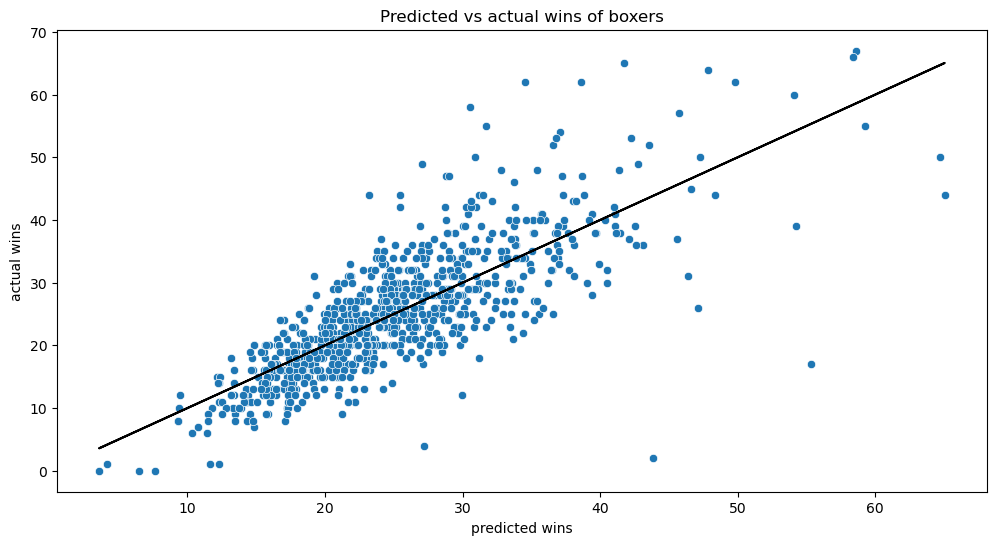

In [27]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = boxers_data, x = 'wins_hat', y = 'Wins')
plt.plot(boxers_data.wins_hat, boxers_data.wins_hat, color = 'k')
plt.xlabel('predicted wins')
plt.ylabel('actual wins')
plt.title('Predicted vs actual wins of boxers');

The overestimated fighter is where the model overestimates the most, aka where the `residuals` are the largest in abosulte value. But how are the residuals calculated?

In [28]:
boxers_data['residuals'] = reg4.resid

In [29]:
boxers_data[['Wins', 'wins_hat', 'residuals']].iloc[0:10]

,Wins,wins_hat,residuals
0,20,20.525170,-0.525170
1,11,12.315781,-1.315781
2,20,17.931716,2.068284
3,47,37.224354,9.775646
4,53,42.276829,10.723171
5,24,21.550954,2.449046
6,25,25.271240,-0.271240
7,13,16.477679,-3.477679
8,18,22.708892,-4.708892
9,15,16.457359,-1.457359


As we can see 
\begin{equation}
\text{residuals = actual - predicted}
\end{equation}

So the overestimated fighter is...

In [30]:
boxers_data_best_fighter = boxers_data[boxers_data.residuals == boxers_data.residuals.min()]
boxers_data_best_fighter.T

,690
Name,Anderson Silva
Nationality,Brazil
Age,49
Height,188
Stance,orthodox
Weight Division,Light Heavyweight
Wins,2
Wins By KO,1
"Knockout, %",50
Losses,2


##### (*) As we can see fighter _Anderson Silva_ got a predicted wins of around 44 when the true wins are 2. Let's locate it in the plot.

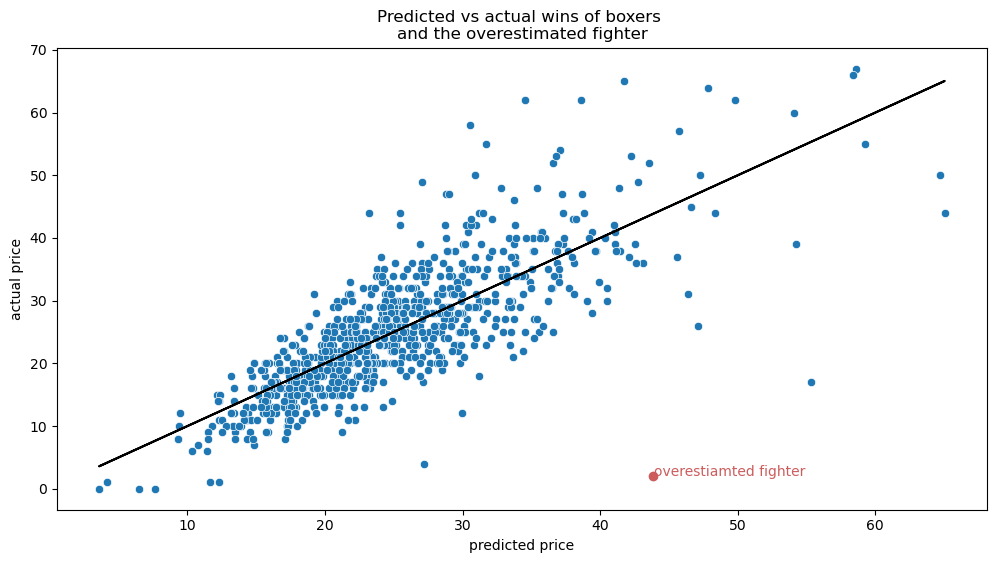

In [31]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = boxers_data, x = 'wins_hat', y = 'Wins')
plt.plot(boxers_data.wins_hat, boxers_data.wins_hat, color = 'k')
plt.xlabel('predicted price')
plt.ylabel('actual price')
# identifying the overestimated fighter
plt.plot(boxers_data_best_fighter.wins_hat, boxers_data_best_fighter.Wins, marker = 'o', color = 'indianred') 
plt.text(x= boxers_data_best_fighter.wins_hat + 0.05, y = boxers_data_best_fighter.Wins, s = 'overestiamted fighter', color = 'indianred')
plt.title('Predicted vs actual wins of boxers \nand the overestimated fighter');

<hr>

## Simple Linear Probablity Models (LPM)

#### Let's shift our focus towards probability changes in terms of binary outcome. In this way, we will have a more targeted outlook on the differences between high and low performers in terms of wins.
- `High Wins`: let's define high wins as 15
- `Low Wins`: otherwise

In [32]:
boxers_data['high_wins'] = np.where(boxers_data['Wins'] > 15, 1, 0)

<h1 align='center'>...</h1>

#### Again starting with simpler models such as predictive powers of losses solely or losses combined with draws.

`high_wins`

In [33]:
lpm1 = smf.ols("high_wins ~ Losses", data=boxers_data).fit(cov_type="HC1")
lpm2 = smf.ols("high_wins ~ Losses + Draws", data=boxers_data).fit(covtype="HC1")

In [34]:
stargazer = Stargazer([lpm1, lpm2])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

#### Discussion of the coefficients in the second model with combined loss and draws:
- `Constant`: baseline probability of being a boxer with high wins when others are 0.
<br>

- `Losses`: for each loss, the probability of being a boxer with a high wins is increasing by 4.4% holding others fixed. This is counterintuitive but it may also mean that boxers with high wins are more risky leading to some losses.
<br>

- `Draws`: for each draw, the probability of being a boxer with a high wins is increased by 2.7% holding others fixed. 

##### (*) A model with combined predictors is performing a slightly better than losses solely with R_2 of 0.106.

In [35]:
boxers_data["pred1"] = lpm1.predict()

pd.crosstab(index=boxers_data["pred1"], columns=boxers_data["Losses"])

Losses,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16
pred1,,,,,,,,,,,,,,,,
0.708758,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.755417,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.802076,0,0,147,0,0,0,0,0,0,0,0,0,0,0,0,0
0.848735,0,0,0,133,0,0,0,0,0,0,0,0,0,0,0,0
0.895395,0,0,0,0,98,0,0,0,0,0,0,0,0,0,0,0
0.942054,0,0,0,0,0,66,0,0,0,0,0,0,0,0,0,0
0.988713,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0
1.035372,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0
1.082031,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0


In [36]:
pd.crosstab(index=boxers_data["high_wins"], columns=boxers_data["Losses"], margins = True)

Losses,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,All
high_wins,,,,,,,,,,,,,,,,,
0,54,37,24,4,7,0,1,1,0,0,0,0,0,0,0,0,128
1,66,114,123,129,91,66,43,29,13,10,4,4,3,1,3,1,700
All,120,151,147,133,98,66,44,30,13,10,4,4,3,1,3,1,828


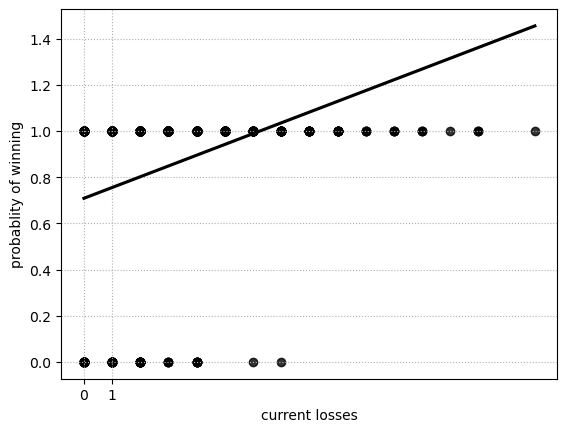

In [37]:
sns.regplot(data = boxers_data, x = 'Losses', y = 'high_wins', ci = None, color = 'k')
plt.grid(linestyle = 'dotted')
plt.xticks([0 ,1])
plt.xlabel('current losses')
plt.ylabel('probablity of winning');

<hr>

#### Moving to more Complex Model

#### Baseline LPM

In [38]:
lpm3 = smf.ols(
    "high_wins ~ lspline(Age, [25, 35]) + lspline(Height, [170, 180]) + Featherweight + Heavyweight + Q('Knockout, %') + Debut",
    boxers_data,
).fit(covtype="HC1")

In [39]:
stargazer = Stargazer([lpm3])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

#### (*) The model performance is increased to 0.255 after introducing compel model incorporating different predictors in predicting being a boxer with high wins.

<h1 align='center'>...</h1>

In [40]:
boxers_data["pred_lpm"] = lpm3.predict()

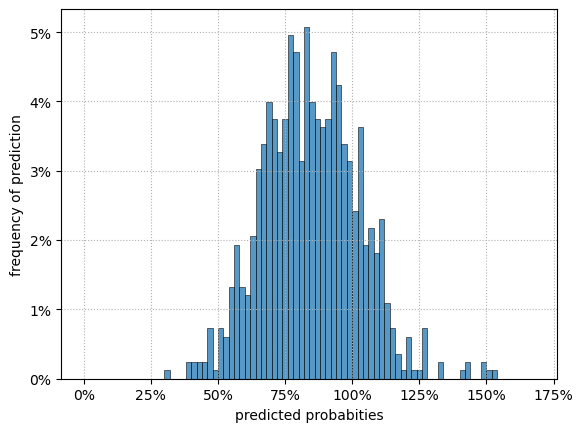

In [41]:
g = sns.histplot(
    data = boxers_data, x = 'pred_lpm', stat = 'probability', bins = [x/100 for x in range(0,170, 2)])
#aesthetics
ylabels = ['{:.0%}'.format(x) for x in g.get_yticks()] #  getting the y ticks and reformatting them as percent
g.set_yticklabels(ylabels)
xlabels = ['{:.0%}'.format(x) for x in g.get_xticks()] #  getting the x ticks and reformatting them as percent
g.set_xticklabels(xlabels)
plt.xlabel('predicted probabities')
plt.ylabel('frequency of prediction')
plt.grid(linestyle = 'dotted');

#### (*) As we can see some probablities are more than 100% showing the pitfalls of Linear probability models as they do not constrain probabilities to 100%. So, it is better to run Logit or Probit models which constrain probabilities to [0,1] range.

<hr>

#### Logit modelling

`patsy` is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices. It is closely inspired by and compatible with the formula mini-language used in R and S.

Patsy’s goal is to become the standard high-level interface to describing statistical models in Python, regardless of what particular model or library is being used underneath.

- Allows data transformations to be specified using arbitrary Python code: instead of x, we can write log(x) or (x > 0)
- Gives a range of convenient options for coding categorical variables
- Provides basic built-in transformations
- Provides a language for easy-to-read specification of linear constraints
- Features a simple API for integration into statistical packages. 

In [42]:
y, X = dmatrices(
    "high_wins ~ lspline(Age, [25, 35]) + lspline(Height, [170, 180]) + Featherweight + Heavyweight + Q('Knockout, %') + Debut",
    boxers_data,
)

`dmatrices()` constructs two design matrices given a formula_like and data. By convention, the first matrix is the “outcome” or “y” data, and the second is the “predictor” or “x” data.

In [43]:
type(X)

patsy.design_info.DesignMatrix

In [44]:
X

DesignMatrix with shape (828, 11)
  Columns:
    ['Intercept',
     'Featherweight[T.True]',
     'Heavyweight[T.True]',
     'lspline(Age, [25, 35])[0]',
     'lspline(Age, [25, 35])[1]',
     'lspline(Age, [25, 35])[2]',
     'lspline(Height, [170, 180])[0]',
     'lspline(Height, [170, 180])[1]',
     'lspline(Height, [170, 180])[2]',
     "Q('Knockout, %')",
     'Debut']
  Terms:
    'Intercept' (column 0)
    'Featherweight' (column 1)
    'Heavyweight' (column 2)
    'lspline(Age, [25, 35])' (columns 3:6)
    'lspline(Height, [170, 180])' (columns 6:9)
    "Q('Knockout, %')" (column 9)
    'Debut' (column 10)
  (to view full data, use np.asarray(this_obj))

In [45]:
X.design_info.column_names

['Intercept',
 'Featherweight[T.True]',
 'Heavyweight[T.True]',
 'lspline(Age, [25, 35])[0]',
 'lspline(Age, [25, 35])[1]',
 'lspline(Age, [25, 35])[2]',
 'lspline(Height, [170, 180])[0]',
 'lspline(Height, [170, 180])[1]',
 'lspline(Height, [170, 180])[2]',
 "Q('Knockout, %')",
 'Debut']

In [46]:
np.asarray(X)[0:5]

array([[1.000e+00, 0.000e+00, 0.000e+00, 2.500e+01, 6.000e+00, 0.000e+00,
        1.700e+02, 7.000e+00, 0.000e+00, 6.000e+01, 2.015e+03],
       [1.000e+00, 1.000e+00, 0.000e+00, 2.500e+01, 6.000e+00, 0.000e+00,
        1.700e+02, 0.000e+00, 0.000e+00, 6.400e+01, 2.021e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, 2.500e+01, 5.000e+00, 0.000e+00,
        1.700e+02, 5.000e+00, 0.000e+00, 6.000e+01, 2.017e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, 2.500e+01, 1.000e+01, 9.000e+00,
        1.700e+02, 5.000e+00, 0.000e+00, 6.400e+01, 2.003e+03],
       [1.000e+00, 0.000e+00, 1.000e+00, 2.500e+01, 1.000e+01, 1.300e+01,
        1.700e+02, 1.000e+01, 7.000e+00, 5.800e+01, 1.999e+03]])

In [47]:
X.shape

(828, 11)

In [48]:
y

DesignMatrix with shape (828, 1)
  high_wins
          1
          0
          1
          1
          1
          1
          1
          0
          1
          0
          1
          1
          0
          0
          1
          1
          0
          1
          1
          1
          1
          1
          1
          0
          1
          1
          1
          1
          1
          1
  [798 rows omitted]
  Terms:
    'high_wins' (column 0)
  (to view full data, use np.asarray(this_obj))

In [49]:
np.asarray(y)

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [50]:
y.shape

(828, 1)

In [51]:
y.ravel().shape

(828,)

**GLM**

In [52]:
logit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit = logit.fit()

In [53]:
print(logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              high_wins   No. Observations:                  828
Model:                            GLM   Df Residuals:                      817
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -184.12
Date:                Sun, 05 Jan 2025   Deviance:                       368.23
Time:                        23:16:44   Pearson chi2:                 2.27e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3406
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**logit**

In [54]:
logit = sm.Logit(y, X)
logit_result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.222363
         Iterations 10


In [55]:
print(logit_result.summary())

                           Logit Regression Results                           
Dep. Variable:              high_wins   No. Observations:                  828
Model:                          Logit   Df Residuals:                      817
Method:                           MLE   Df Model:                           10
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.4836
Time:                        23:16:44   Log-Likelihood:                -184.12
converged:                       True   LL-Null:                       -356.53
Covariance Type:            nonrobust   LLR p-value:                 5.003e-68
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1547.6132    154.202     10.036      0.000    1245.383    1849.844
Featherweight[T.True]              0.2025      0.632      0.320      0.

In [56]:
boxers_data["pred_logit"] = logit_result.predict()

**probit**

In [57]:
probit = sm.Probit(y, X)
probit_result = probit.fit()

Optimization terminated successfully.
         Current function value: 0.233790
         Iterations 9


In [58]:
print(probit_result.summary())

                          Probit Regression Results                           
Dep. Variable:              high_wins   No. Observations:                  828
Model:                         Probit   Df Residuals:                      817
Method:                           MLE   Df Model:                           10
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.4570
Time:                        23:16:45   Log-Likelihood:                -193.58
converged:                       True   LL-Null:                       -356.53
Covariance Type:            nonrobust   LLR p-value:                 5.141e-64
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        730.5552     66.537     10.980      0.000     600.146     860.965
Featherweight[T.True]              0.1237      0.338      0.366      0.

In [59]:
boxers_data["pred_probit"] = probit_result.predict()

#### Comparing predicted probablities

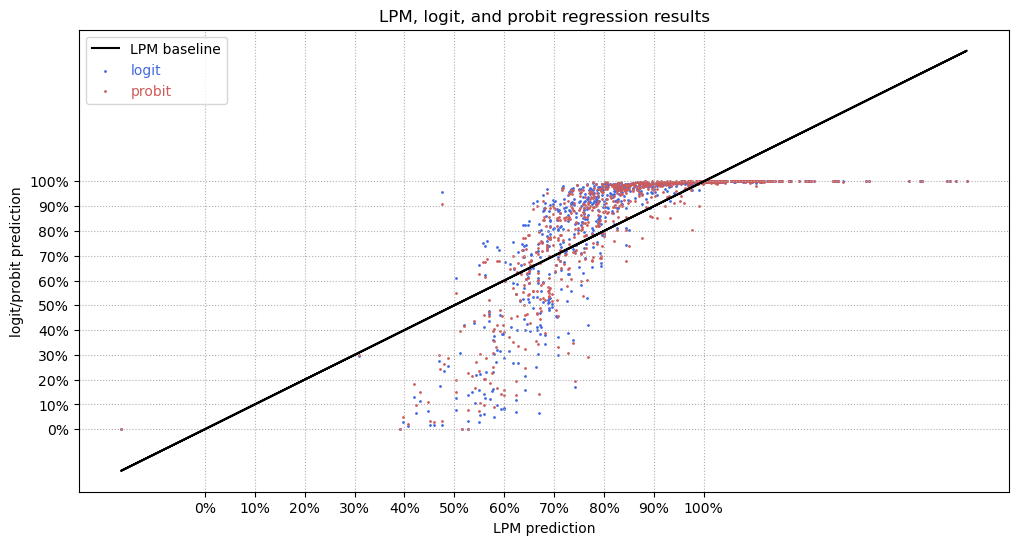

In [60]:
fig, ax = plt.subplots(figsize = (12,6))

# data
ax.plot(boxers_data.pred_lpm, boxers_data.pred_lpm, color = 'k', label = 'LPM baseline')
ax.scatter(boxers_data.pred_lpm, boxers_data.pred_logit, color = 'royalblue', s = 1, label = 'logit')
ax.scatter(boxers_data.pred_lpm, boxers_data.pred_probit, color = 'indianred', s = 1, label = 'probit')

# aesthetics
ax.set_xticks(np.linspace(0,1, num = 11))
ax.set_xticklabels(['{:.0%}'.format(x) for x in np.linspace(0,1, num = 11)])
ax.set_yticks(np.linspace(0,1, num = 11))
ax.set_yticklabels(['{:.0%}'.format(y) for y in np.linspace(0,1, num = 11)])

plt.legend(labelcolor = ['k', 'royalblue', 'indianred'])
plt.grid(linestyle = 'dotted')
plt.xlabel('LPM prediction')
plt.ylabel('logit/probit prediction')
plt.title('LPM, logit, and probit regression results');

#### (*) We can see that logit or probit models constrain probabilities to [0,1] range but LPM does not due to its linear nature over or under-shooting probabilities at the extremes. Logit and Probit models perform quite similarly in predicting a being a boxer with a high wins.

<hr>

#### Model comparison: mean & median

In [61]:
boxers_data.groupby("high_wins")[
    ["pred_lpm", "pred_logit", "pred_probit"]
].mean().round(3)

,pred_lpm,pred_logit,pred_probit
high_wins,,,
0,0.630,0.425,0.454
1,0.885,0.922,0.914


In [62]:
boxers_data.groupby("high_wins")[
    ["pred_lpm", "pred_logit", "pred_probit"]
].median().round(3)

,pred_lpm,pred_logit,pred_probit
high_wins,,,
0,0.638,0.401,0.456
1,0.876,0.988,0.986


<h1 align='center'>...</h1>

#### Model comparison: goodness of fit

In [63]:
pd.DataFrame(
    {
        "R-squared": [
            lpm3.rsquared,
            r2_score(boxers_data["high_wins"], boxers_data["pred_logit"]),
            r2_score(boxers_data["high_wins"], boxers_data["pred_probit"]),
        ],
        "Brier-score": [
            mean_squared_error(boxers_data["high_wins"], boxers_data["pred_lpm"]),
            mean_squared_error(boxers_data["high_wins"], boxers_data["pred_logit"]),
            mean_squared_error(boxers_data["high_wins"], boxers_data["pred_probit"]),
        ],
        "Pseudo R-squared": [np.nan, logit_result.prsquared, probit_result.prsquared],
        "Log-loss": [
            -1 * log_loss(boxers_data["high_wins"], boxers_data["pred_lpm"]),
            -1 * log_loss(boxers_data["high_wins"], boxers_data["pred_logit"]),
            -1 * log_loss(boxers_data["high_wins"], boxers_data["pred_probit"]),
        ],
    },
    index=["LPM", "Logit", "Probit"],
).T.round(3)

,LPM,Logit,Probit
R-squared,0.255,0.523,0.500
Brier-score,0.097,0.062,0.065
Pseudo R-squared,NaN,0.484,0.457
Log-loss,-0.342,-0.222,-0.234


#### (*) Out of the 3 models:
- only Logit is performing well compared to others in terms of R_2 of 0.523. 
<br>

- In terms of Brier-score, LPM is over or under-shooting probabilites with high score, while other two models are performing quite similarly with good calibration of probs. 
<br>

- Regarding Pseudo R_2, the best model is Logit as it shows a good fit with a score of 0.484 compared to others.
<br>

- Looking at Log-loss we can say that Logit is also performing well with lowest score meaning best performer in predicting high win probabilities.
<br>

#### Overall, Logit model is best and accurate among other 2 models in terms of all performance metrics despite Brier-score.